$\Large\textbf{Lab 5.} \large\textbf{Exercise 1.}$



Recall that to solve problems of the form $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$, the update rule involved in Newton's method is of the form: 
\begin{align}
\mathbf{x}^{k+1} = \mathbf{x}^{k} - \eta^k (\nabla^2 f(\mathbf{x}^{k}))^{-1} \nabla f(\mathbf{x}^{k}).   
\end{align}

Now we will discuss a method which avoids explicit computation of the inverse of Hessian matrix at each iteration, but is nearly efficient as the Newton's method. This method will be called BFGS named after the famous applied Mathematicians Broyden, Fletcher, Goldfarb and Shanno. 

The main idea of BFGS method is to replace the inverse of Hessian matrix $(\nabla^2 f(\mathbf{x}^{k}))^{-1}$ in the update rule of Newton's method with a surrogate term $B^k$. 

Therefore the update rule of BFGS looks as follows:
\begin{align}
\mathbf{x}^{k+1} = \mathbf{x}^{k} - \eta^k B^k \nabla f(\mathbf{x}^{k})   
\end{align}
where $B^k$ is a surrogate for the inverse of Hessian matrix. 

To find a suitable candidate for $B^k$, we need to consider some favorable characteristics expected from $B^k$: 

\begin{align}
&B^k \text{ is symmetric positive definite}.  \\
&B^k \text{ does not involve computing Hessian or its inverse and should be computable only from the gradients}.  \\
&\text{Replacing  } (\nabla^2 f(\mathbf{x}^{k}))^{-1} \text{ with } B^k \text{ should not slow down the algorithm too much}. \\ 
\end{align}




To design a suitable $B^k$ we shall consider the quadratic approximation of $f$:

\begin{align}
\tilde{f}(\mathbf{x}) = f(\mathbf{x}^{k+1}) + \left \langle \nabla f(\mathbf{x}^{k+1}), \mathbf{x}-\mathbf{x}^{k+1}\right \rangle  + \frac{1}{2} (\mathbf{x}-\mathbf{x}^{k+1})^\top H^{k+1} (\mathbf{x}-\mathbf{x}^{k+1}). 
\end{align}
where $H^{k+1} = \nabla^2 f({\mathbf{x}}^{k+1})$.

Note that using this quadratic approximation we have the gradient as:
\begin{align}
\nabla \tilde{f}(\mathbf{x}) = \nabla f(\mathbf{x}^{k+1}) + H^{k+1}(\mathbf{x}-\mathbf{x}^{k+1}). 
\end{align}

In order to assume $\tilde{f}$ to behave similar to $f$, we expect the following. 

By plugging in $\mathbf{x} = \mathbf{x}^k$ and $\mathbf{x}=\mathbf{x}^{k+1}$, we expect the following from the previous gradient equation:
\begin{align}
\nabla \tilde{f} (\mathbf{x}^k) = \nabla f(\mathbf{x}^k) \text{ and }\\ 
\nabla \tilde{f} (\mathbf{x}^{k+1}) = \nabla f(\mathbf{x}^{k+1}). 
\end{align}

The relation $\nabla \tilde{f} (\mathbf{x}^{k+1}) = \nabla f(\mathbf{x}^{k+1})$ directly follows from the gradient relation  $\nabla \tilde{f}(\mathbf{x}) = \nabla f(\mathbf{x}^{k+1}) + H^{k+1}(\mathbf{x}-\mathbf{x}^{k+1})$.

For the gradient relation to satisfy $\nabla \tilde{f} (\mathbf{x}^k) = \nabla f(\mathbf{x}^k)$ we need:
\begin{align}
\nabla \tilde{f} (\mathbf{x}^k) &= \nabla f(\mathbf{x}^{k+1}) + H^{k+1}(\mathbf{x}^{k}-\mathbf{x}^{k+1}) = \nabla f(\mathbf{x}^k) \\
\implies H^{k+1}(\mathbf{x}^{k}-\mathbf{x}^{k+1}) &= (\nabla f(\mathbf{x}^{k})- \nabla {f} (\mathbf{x}^{k+1})) \\
\implies H^{k+1}(\mathbf{x}^{k+1}-\mathbf{x}^{k}) &= (\nabla f(\mathbf{x}^{k+1})- \nabla {f} (\mathbf{x}^k)).
\end{align}
This previous equality is called the $\textbf{secant equation}$. 

From the secant equation we see that inverse of $H^{k+1}$ operates on the difference of gradients $(\nabla f(\mathbf{x}^{k+1})- \nabla {f} (\mathbf{x}^k))$  to yield the difference of iterates $(\mathbf{x}^{k+1}-\mathbf{x}^{k})$. 

The secant equation can be equivalently and compactly written as:
\begin{align}
(H^{k+1})^{-1} \mathbf{y}^k = \mathbf{s}^k. 
\end{align}
where $\mathbf{y}^k = (\nabla f(\mathbf{x}^{k+1})- \nabla {f} (\mathbf{x}^k))$ and $\mathbf{s}^k = (\mathbf{x}^{k+1}-\mathbf{x}^{k})$. 

We shall be considering $(H^{k+1})^{-1}$ as a possible choice for $B^{k+1}$ in the BFGS update rule. 

Hence we make sure that $(H^{k+1})^{-1}$ is positive definite. This is equivalent to considering: 
\begin{align}
(\mathbf{y}^{k})^\top (H^{k+1})^{-1} \mathbf{y}^k > 0 
\end{align}
for any non-zero $\mathbf{y}^k$ which implies that $(\mathbf{y}^k)^\top \mathbf{s}^k > 0$. 


Generally solving the secant equation $(H^{k+1})^{-1} \mathbf{y}^k = \mathbf{s}^k$ leads to infinitely many solutions for the matrix $(H^{k+1})^{-1}$ since there are $n^2$ unknowns and $n$ equations. Hence to select a suitable $(H^{k+1})^{-1}$ we solve an optimization problem of the form: 

\begin{align}
\min_H \|H-(H^k)^{-1}\| \ s.t. \ H=H^\top, \ H\mathbf{y}^k=\mathbf{s}^k.
\end{align}
By using an appropriate norm in the optimization problem, we can get the following update rule for the matrix $(H^{k+1})^{-1} = (I-\mu^k \mathbf{s}^k (\mathbf{y}^k)^\top) (H^{k})^{-1} (I-\mu^k \mathbf{y}^k (\mathbf{s}^k)^\top) + \mu^k \mathbf{s}^k (\mathbf{s}^k)^\top$

where $\mu^k = \frac{1}{(\mathbf{y}^k)^\top \mathbf{s}^k}$.

By taking $B^k = (H^k)^{-1}$, this update rule can now be written as:

$B^{k+1} = (I-\mu^k \mathbf{s}^k (\mathbf{y}^k)^\top) B^{k} (I-\mu^k \mathbf{y}^k (\mathbf{s}^k)^\top) + \mu^k \mathbf{s}^k (\mathbf{s}^k)^\top$

where $\mu^k = \frac{1}{(\mathbf{y}^k)^\top \mathbf{s}^k}$.

As long as $B^k$ is positive definite, the update rule guarantees that $B^{k+1}$ is also positive definite. 

Hence in Exercises 1 and 2, we shall be implementing BFGS method to solve problems of the form $\min_{\mathbf{x}\in{\mathbb{R}}^n} f(\mathbf{x})$, and check its  performance against Newton method. 

In [ ]:
#Let us now check the time taken for computing the inverse of a matrix A
from timeit import default_timer as timer
import numpy as np 

#create a random nxn matrix 
n = 100
B = np.random.rand(n, n)
A = np.matmul(B,B.T) #Note: This construction ensures that A is symmetric
A = np.add(A, 0.001*np.identity(n)) #this diagonal perturbation helps to make the matrix positive definite 

start_time = timer()
A_inv = np.linalg.inv(A)
end_time = timer()
print('Time taken to compute inverse of A:',end_time - start_time) 

Time taken to compute inverse of A: 0.012456501000002618


#Que.1

we can take $B^0$ as a scalar multiple of identity matrix or a diagonal matrix.

#Que.2

In [ ]:
def evalf(x,n):  
  assert type(x) is np.ndarray and len(x) == n 
  fun_val = 0
  for i in range(n-1):   
    fun_val = fun_val + 4*(x[i]**2 - x[i+1])**2 + (x[i] - 1)**2 
  return fun_val  

In [ ]:
def evalg(x,n):  
  assert type(x) is np.ndarray and len(x) == n
  grad_list = [16*(x[0]**2 - x[1])*x[0] + 2*(x[0] -1)]
  for i in range(n-2):
     grad_list.append(16*(x[i+1]**2 - x[i+2])*x[i+1] + 2*(x[i+1] -1) - 8*(x[i]**2 - x[i+1]))
  grad_list.append(- 8*(x[n-2]**2 - x[n-1]))   
  a=np.array(grad_list).reshape((n,1))
  return a

In [ ]:
def compute_steplength_backtracking(n,x, gradf, direction, alpha_start, rho, gamma):
  assert type(x) is np.ndarray and len(x) == n 
  assert type(gradf) is np.ndarray and len(gradf) == n  
  assert type(direction) is np.ndarray and len(gradf) == n
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  
  alpha = alpha_start
  while evalf(x+alpha*direction,n)>evalf(x,n)+gamma*alpha*np.matmul(gradf.T,direction):
    alpha=rho*alpha

  return alpha

In [ ]:
BACKTRACKING_LINE_SEARCH = 1
CONSTANT_STEP_LENGTH=2
EXACT_LINE_SEARCH=3


In [ ]:
def find_minimizer_BFGS(n,start_x, tol, *args):
  assert type(start_x) is np.ndarray  and len(start_x) == n
  assert type(tol) is float and tol>=0 

  x = start_x
  g_x = evalg(x,n)
  B_k = np.identity(n)/8

  alpha_start = args[0]
  rho = args[1]
  gamma = args[2]

  k=0
  while (np.linalg.norm(g_x) > tol):
    p_k = -np.matmul(B_k, g_x)
    step_length = compute_steplength_backtracking(n, x, g_x, p_k, alpha_start, rho, gamma)
   
    x_0 = x
    x = x + np.multiply(step_length,p_k) 
    s_k = x - x_0
    y_k = evalg(x,n)-evalg(x_0,n)
    u_k = (np.matmul(y_k.T,s_k))**(-1)

    first_term = np.identity(n) - u_k*np.matmul(s_k,y_k.T)
    sec_term = np.identity(n)- u_k*np.matmul(y_k, s_k.T)
    B_k = np.matmul(np.matmul(first_term,B_k),sec_term) + u_k*np.matmul(s_k,s_k.T)

    k += 1
    g_x = evalg(x,n)
  return x, evalf(x,n), k

#Que.3

In [ ]:
from tabulate import tabulate

n_lst = [1000,2500,5000,7500,10000]
my_tol = 10**(-3)
tt = []
obj = []
x = []
itr_lst = []

for n in n_lst:
  start_x = np.array([0 for i in range(n)]).reshape((n,1))
  time1 = timer()
  x_min ,k,fun  = find_minimizer_BFGS(n, start_x, my_tol, 0.9, 0.5 ,0.5 )
  time2 = timer()
  itr_lst.append(k)
  x.append(x_min)
  obj.append(fun)
  time = time2 - time1
  tt.append(time)
  print(f"for n= {n}")
  print(f"optimizer={x_min}")
  print(f"time taken={time}")


for n= 1000
optimizer=[[0.99999134]
 [0.99999843]
 [0.99999884]
 [1.00000127]
 [1.00000099]
 [1.0000017 ]
 [1.0000015 ]
 [1.00000042]
 [1.00000006]
 [0.99999905]
 [0.99999766]
 [0.99999646]
 [0.99999551]
 [0.99999904]
 [1.00000218]
 [1.00000337]
 [1.00000494]
 [1.00000226]
 [0.99999928]
 [0.99999738]
 [0.99999706]
 [0.999998  ]
 [1.00000055]
 [1.00000137]
 [1.00000158]
 [1.00000025]
 [0.99999986]
 [0.99999879]
 [0.99999883]
 [1.00000218]
 [0.99999973]
 [0.9999986 ]
 [1.00000117]
 [0.99999954]
 [1.00000003]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997

In [ ]:
for i in range(len(n_lst)):
  print("\nFor n :", n_lst[i], end = " ")
  print("Optimizer : ", x[i])


For n : 1000 Optimizer :  [[0.99999134]
 [0.99999843]
 [0.99999884]
 [1.00000127]
 [1.00000099]
 [1.0000017 ]
 [1.0000015 ]
 [1.00000042]
 [1.00000006]
 [0.99999905]
 [0.99999766]
 [0.99999646]
 [0.99999551]
 [0.99999904]
 [1.00000218]
 [1.00000337]
 [1.00000494]
 [1.00000226]
 [0.99999928]
 [0.99999738]
 [0.99999706]
 [0.999998  ]
 [1.00000055]
 [1.00000137]
 [1.00000158]
 [1.00000025]
 [0.99999986]
 [0.99999879]
 [0.99999883]
 [1.00000218]
 [0.99999973]
 [0.9999986 ]
 [1.00000117]
 [0.99999954]
 [1.00000003]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.99999997]
 [0.999

In [ ]:
table = [["n", " bfgs timing "]]
for i in  range(len(tt)):
    table.append([n_lst[i] , tt[i] ])    
print(tabulate(table, headers = "firstrow",tablefmt="grid"))

+-------+-----------------+
|     n |    bfgs timing  |
+=======+=================+
|  1000 |         8.92486 |
+-------+-----------------+
|  2500 |        80.6197  |
+-------+-----------------+
|  5000 |       439.365   |
+-------+-----------------+
|  7500 |      1450.41    |
+-------+-----------------+
| 10000 |      3478.33    |
+-------+-----------------+


#Que.4

In [ ]:
def evalh(n, x):
  assert type(x) is np.ndarray and len(x) == n
  h = np.zeros((n,n)) 
  h[0][0] = 48*(x[0])**2 - 16*x[1] + 2
  h[0][1] = -16*x[0]
  for i in range(n-2): 
    h[i+1][i+1] = 8 + 16*(x[i+1]**2 - x[i+2]) + 32*x[i+1]**2 +2
    h[i+1][i+2] = -16*x[i+1]
    h[i+1][i] = h[i][i+1]  
  h[n-1][n-2] = h[n-2][n-1]
  h[n-1][n-1] = 8

  return h

In [ ]:
def find_minimizer_newton(n, start_x, tol,line_search_type, *args):
  assert type(start_x) is np.ndarray and len(start_x)  == n 
  assert type(tol) is float and tol>=0 

  x = start_x
  g_x = evalg( x, n)

  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]

  k=0
  while (np.linalg.norm(g_x) > tol):
    D_k = np.linalg.inv(evalh(n, x))
    p_k = -np.matmul(D_k, g_x)
    step_length = compute_steplength_backtracking(n,x, g_x, p_k, alpha_start, rho, gamma)

    x = np.add(x, np.multiply(step_length,p_k))
    k += 1  
    g_x = evalg(x, n ) 

  return x, k, evalf(x, n)

#Que.5

In [ ]:
my_tol = 10**(-3)
alpha = 0.9
rho = 0.5
gamma = 0.5
tt_n = []
obj_n = []
x_n = []
itr_lst_n = []

for n in n_lst:
  start_x = np.array([0 for j in range(n)]).reshape((n,1))
  time1_n = timer()
  x_min_n ,k_n ,fun_n  = find_minimizer_newton(n, start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha, rho, gamma )
  time2_n = timer()
  itr_lst_n.append(k_n)
  x_n.append(x_min_n)
  obj_n.append(fun_n)
  time_n = time2_n - time1_n
  tt_n.append(time_n)
  print(f"for n= {n}")
  print(f"optimizer={x_min_n}")
  print(f"time taken={time_n}")


KeyboardInterrupt: ignored

Above method is taking a long time because in this method we are computing the inverse of hassian matrix and size of hassian matrix is large for large n and computing inverse of such large matrix takes very large amount of time.
i ran it for more than 6 hr. but it didn't terminate. 

#Que.6

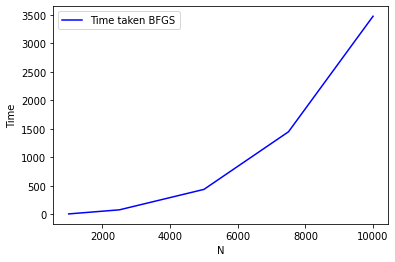

In [ ]:
import matplotlib.pyplot as plt
plt.plot(n_lst , tt ,color = "blue")
plt.legend(["Time taken BFGS"])
plt.xlabel("N")
plt.ylabel("Time")
plt.show()

In the above graph we can see that the time taken by BFGS algorithm is increasing with increse in the value of n.